In [2]:
import csv
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from allennlp.modules.elmo import Elmo, batch_to_ids

import pickle



DS = pd.read_csv("ObjectSubset150SentenceLength.csv")
DS['tag'].fillna('text', inplace=True)
words = list(set(DS["word"].values))
n_words = len(words)
tags = list(set(DS["tag"].values))
n_tags = len(tags)

# class SentenceGetter(object):
#     def __init__(self, data):
#         self.n_sent = 1
#         self.data = data
#         self.empty = False
#         agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
#                                                            s["tag"].values.tolist())]
#         self.grouped = self.data.groupby("text_ID").apply(agg_func)
#         self.sentences = [s for s in self.grouped]

# getter = SentenceGetter(DS)
# sentences = getter.sentences

max_len = 10
tags2 = ["PAD","object","text"]
tag2idx = {t: i  for i, t in enumerate(tags2)}

# X = [[w[0] for w in s] for s in sentences]

# new_X = []
# for seq in X:
#     new_seq = []
#     for i in range(max_len):
#         try:
#             new_seq.append(seq[i])
#         except:
#             new_seq.append("PAD")
#     new_X.append(new_seq)
# X = new_X

# y = [[tag2idx[w[1]] for w in s] for s in sentences]

# from keras.preprocessing.sequence import pad_sequences
# y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["PAD"], truncating='post')

idx2tag = {i: w for w, i in tag2idx.items()}

# from sklearn.model_selection import train_test_split
# X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2018)



batch_size = 32


# options_file = "options.json"
# weight_file = "swb_weights.hdf5"
# elmo_model  = Elmo(options_file, weight_file, 2, dropout=0)



# X_tr_character_ids = batch_to_ids(X_tr)
# X_tr_embeddings = elmo_model(X_tr_character_ids)
# pickle.dump(X_tr_embeddings, open('X_tr_embeddings.pickle', 'wb'))

# X_te_character_ids = batch_to_ids(X_te)
# X_te_embeddings = elmo_model(X_te_character_ids)
# pickle.dump(X_te_embeddings, open('X_te_embeddings.pickle', 'wb'))



# pickle.dump(y_tr, open('y_tr.pickle', 'wb'))
# pickle.dump(y_te, open('y_te.pickle', 'wb'))



In [2]:
# import tensorflow.compat.v1 as tf
# from keras import backend as K

# # import tensorflow_hub as hub
# # from keras import backend as K
# # sess = tf.Session()

# # init = tf.global_variables_initializer() # This reinitializes keras weights, so must be put before Keras loading
# sess.run(init)
# sess.run(tf.global_variables_initializer())
# K.set_session(sess)

# import tensorflow as tf
# import tensorflow_hub as hub
# from keras import backend as K


In [3]:
# sess = tf.Session()
# K.set_session(sess)


In [3]:
from allennlp.modules.elmo import Elmo, batch_to_ids
options_file = "options.json"
weight_file = "swb_weights.hdf5"
elmo_model  = Elmo(options_file, weight_file, 2, dropout=0)


In [4]:
# from keras.models import Model, Input
# from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda


In [6]:
# X_tr_character_ids = batch_to_ids(X_tr)
# X_tr_embeddings = elmo_model(X_tr_character_ids)

# X_te_character_ids = batch_to_ids(X_te)
# X_te_embeddings = elmo_model(X_te_character_ids)

In [6]:
# Load pickle files that was prepared in UT server.
with open('elmoembedings\X_tr_embeddings.pickle', 'rb') as f:
    X_tr_embeddings = pickle.load(f)

with open('elmoembedings\X_te_embeddings.pickle', 'rb') as f:
    X_te_embeddings = pickle.load(f)

In [7]:
X_tr_embeddings['elmo_representations'][1].detach().numpy().shape

(10914, 35, 1024)

In [9]:
# sess.run(tf.compat.v1.global_variables_initializer())
# sess.run(tf.compat.v1.tables_initializer())
# def ElmoEmbedding(x):
#     return elmo_model(inputs={
#                             "tokens": tf.squeeze(tf.cast(x, tf.string)),
#                             "sequence_len": tf.constant(batch_size*[max_len])
#                       },
# #                       signature="tokens",
#                       as_dict=True)["elmo"]

# from keras.models import Model, Input
# from keras.layers.merge import add
# from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

# input_text = Input(shape=(max_len,), dtype=tf.string)
# embedding = Lambda(ElmoEmbedding, output_shape=(None, 1024))(input_text)
# x = Bidirectional(LSTM(units=512, return_sequences=True,
#                        recurrent_dropout=0.2, dropout=0.2))(embedding)
# x_rnn = Bidirectional(LSTM(units=512, return_sequences=True,
#                            recurrent_dropout=0.2, dropout=0.2))(x)
# x = add([x, x_rnn])  # residual connection to the first biLSTM
# out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)


In [8]:
X_tr_embeddings["elmo_representations"][1].shape

torch.Size([10914, 35, 1024])

In [10]:
# Load pickle files that was prepared in UT server.
with open('elmoembedings/y_tr.pickle', 'rb') as f:
    y_tr = pickle.load(f)

with open('elmoembedings/y_te.pickle', 'rb') as f:
    y_te = pickle.load(f)

In [11]:
y_tr.shape

(10914, 35)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, core, Activation, Dense
import numpy as np
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D


model = Sequential()
# model.add(TimeDistributed(LSTM(units=20,input_shape=(10, 1024), return_sequences=False,
#                                 recurrent_dropout=0.5)))

# # main LSTM
# model.add(SpatialDropout1D(0.3))

model.add(Bidirectional(LSTM(20, input_shape=(10, 1024), return_sequences=True,recurrent_dropout=0.5)))

model.add(TimeDistributed(Dense(3, activation='softmax')))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [14]:
history = model.fit(X_tr_embeddings['elmo_representations'][1].detach().numpy(), y_tr.reshape(y_tr.shape[0],35,1),validation_split=0.1 ,verbose=1,epochs=10,batch_size=32)

Train on 9822 samples, validate on 1092 samples
Epoch 1/10
9822/9822 [==============================] - 13s 1ms/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 0.0055 - val_accuracy: 0.9988
Epoch 2/10
9822/9822 [==============================] - 13s 1ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/10
9822/9822 [==============================] - 13s 1ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 4/10
9822/9822 [==============================] - 13s 1ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 5/10
9822/9822 [==============================] - 14s 1ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 6/10
9822/9822 [==============================] - 13s 1ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 7/10
9822/9822 [==============================] - 13s 1ms/step - loss: 0.001

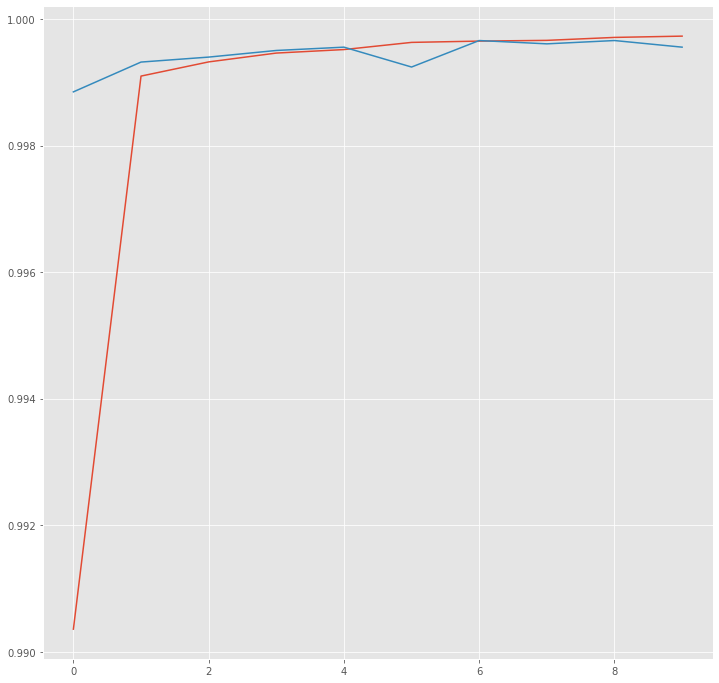

In [15]:
hist = pd.DataFrame(history.history)
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.show()


In [16]:
y_pred = model.predict(X_te_embeddings['elmo_representations'][1].detach().numpy(),verbose=1)

2729/2729 [==============================] - 1s 428us/step


In [17]:
y_pred[1]

array([[2.66355128e-05, 1.63264864e-04, 9.99810159e-01],
       [7.69114104e-06, 1.82649874e-05, 9.99974012e-01],
       [5.55388169e-06, 1.66333302e-05, 9.99977827e-01],
       [5.73447005e-06, 4.55552945e-05, 9.99948740e-01],
       [4.58475151e-05, 3.91817564e-04, 9.99562323e-01],
       [7.71419873e-05, 9.98264968e-01, 1.65794045e-03],
       [4.45707956e-05, 9.98164833e-01, 1.79057452e-03],
       [3.56211531e-05, 3.30557930e-04, 9.99633789e-01],
       [4.34454741e-05, 2.49606936e-04, 9.99706924e-01],
       [2.53178205e-05, 3.14367135e-05, 9.99943256e-01],
       [1.85514473e-05, 2.83163126e-06, 9.99978662e-01],
       [9.99930143e-01, 1.09479452e-05, 5.88664989e-05],
       [9.99966741e-01, 6.34563276e-06, 2.69880420e-05],
       [9.99979496e-01, 5.32358581e-06, 1.50877004e-05],
       [9.99981999e-01, 5.02026796e-06, 1.30119515e-05],
       [9.99982238e-01, 4.98924555e-06, 1.27938019e-05],
       [9.99982476e-01, 4.85847750e-06, 1.26368932e-05],
       [9.99982834e-01, 4.80370

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 35, 40)            167200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 35, 3)             123       
Total params: 167,323
Trainable params: 167,323
Non-trainable params: 0
_________________________________________________________________


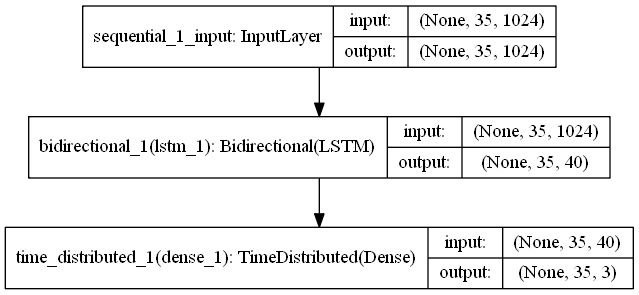

In [25]:

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Elmo_Model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
y_te[1]

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p, axis=-1)
            out_i.append(idx2tag[p_i].replace("PAD","text"))
        out.append(out_i)
    return out
pred_labels = pred2label(y_pred)

def pred2labelV2(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PAD","text"))
        out.append(out_i)
    return out
test_labels = pred2labelV2(y_te)

In [19]:
# i = 4
# p = np.argmax(y_pred[i], axis=-1)
# print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
# print(30 * "=")
# for w, t, pred in zip(X_tr_embeddings[i], y_te[i], p):
#     if w != 0:
#         print("{:15}: {:5} {}".format(w, t, pred))


In [21]:
y_pred[1]

array([[2.66355128e-05, 1.63264864e-04, 9.99810159e-01],
       [7.69114104e-06, 1.82649874e-05, 9.99974012e-01],
       [5.55388169e-06, 1.66333302e-05, 9.99977827e-01],
       [5.73447005e-06, 4.55552945e-05, 9.99948740e-01],
       [4.58475151e-05, 3.91817564e-04, 9.99562323e-01],
       [7.71419873e-05, 9.98264968e-01, 1.65794045e-03],
       [4.45707956e-05, 9.98164833e-01, 1.79057452e-03],
       [3.56211531e-05, 3.30557930e-04, 9.99633789e-01],
       [4.34454741e-05, 2.49606936e-04, 9.99706924e-01],
       [2.53178205e-05, 3.14367135e-05, 9.99943256e-01],
       [1.85514473e-05, 2.83163126e-06, 9.99978662e-01],
       [9.99930143e-01, 1.09479452e-05, 5.88664989e-05],
       [9.99966741e-01, 6.34563276e-06, 2.69880420e-05],
       [9.99979496e-01, 5.32358581e-06, 1.50877004e-05],
       [9.99981999e-01, 5.02026796e-06, 1.30119515e-05],
       [9.99982238e-01, 4.98924555e-06, 1.27938019e-05],
       [9.99982476e-01, 4.85847750e-06, 1.26368932e-05],
       [9.99982834e-01, 4.80370

In [22]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 98.3%


In [23]:
print(classification_report(test_labels, pred_labels))

           precision    recall  f1-score   support

     text       0.99      0.98      0.98      4419
   object       0.99      0.98      0.98      2068

micro avg       0.99      0.98      0.98      6487
macro avg       0.99      0.98      0.98      6487



In [24]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

              precision    recall  f1-score   support

      object       0.99      0.99      0.99      3588
        text       1.00      1.00      1.00     91927

    accuracy                           1.00     95515
   macro avg       1.00      0.99      1.00     95515
weighted avg       1.00      1.00      1.00     95515



In [24]:
# sentences = [['minu', 'nimi' ,'on', 'nesma', 'hästi', 'Eemaldatud', '700', 'ml', 'plasmat','RR',' 112/60',' mmHg'], ['Pt.', 'tehtud' ,'plasmaferees', 'talus', 'hästi']]
# character_ids = batch_to_ids(sentences)
# embeddings = elmo(character_ids)
# scipy.spatial.distance.cosine(embeddings['elmo_representations'][1][1][4].detach().numpy(),embeddings['elmo_representations'][1][1][1].detach().numpy())